# Introduction

In this notebook, daily estimates for the energy consumption of the top 100 mineable cryptocurrencies are calculated. 
In the first section, a hardware based estimation is made. Secondly, a revenue based is made. Finally, we investigate the results and check for inter-and extrapollation.

In [1]:
# Import libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from ipywidgets import *
from datetime import datetime
from IPython.display import Image
from matplotlib.dates import DateFormatter

In [2]:
DATA_PATH = 'data/'
HIST_PATH = DATA_PATH + 'hist/'
HARDWARE_PATH = DATA_PATH+'hardware/'
FIG_PATH = '../../images/'

In [3]:
# Clean market cap and price
def clean_int(string):
    return float(string.strip('$').replace(',',''))

def clean_mineable_data(data):
    data = data.set_index('Name')
    data['market_cap'] = data['market_cap'].apply(lambda x:clean_int(x))    
    data['price'] = data['price'].apply(lambda x:clean_int(x))
    return data

In [4]:
# Read in data
block_time_fix = True
dates = []
data_hist = []
for file in os.listdir(HIST_PATH):
    # Load the daily data in a list
    data_day = pd.read_csv(HIST_PATH+file)
    data_day = clean_mineable_data(data_day)
    if block_time_fix:
        data_day.loc['bitcoin', 'block_time'] = 600
        data_day.loc['ethereum', 'block_time'] = 10
    data_hist.append(data_day)

    # Get the dates in a list
    date = datetime.strptime(file[13:23], '%m-%d-%Y')
    dates.append(date)

In [5]:
# For manual investigation
mineable_100 = pd.read_csv(HIST_PATH+'mineable_100_04-24-2020.csv')
mineable_100 = clean_mineable_data(mineable_100)
found_data = mineable_100[~mineable_100.isnull().any(axis=1)].copy()
# found_data

## Parameters

In [459]:
seconds_in_year = 31536000
hours_in_year = 8760
kWh_to_J = 3600*10**3
W_to_TWh = hours_in_year/(10**12)

std_PUE = {'lower': 1, 'estimate': 1.1, 'upper':1.2}
revenue_percent = 0.60
dry_dates = 43

# Plots
date_form = DateFormatter("%m-%d")

## Geography 

### Coinshares (old)

In [7]:
#print(geography.set_index('location', drop=True).to_latex())

### Cambridge Mining Map

TODO: Scrape and automatise

The dry season extends from October through April, and we will try to adapt electricity prices to this

In [8]:
wet_months = [10,11,12,1,2,3,4]

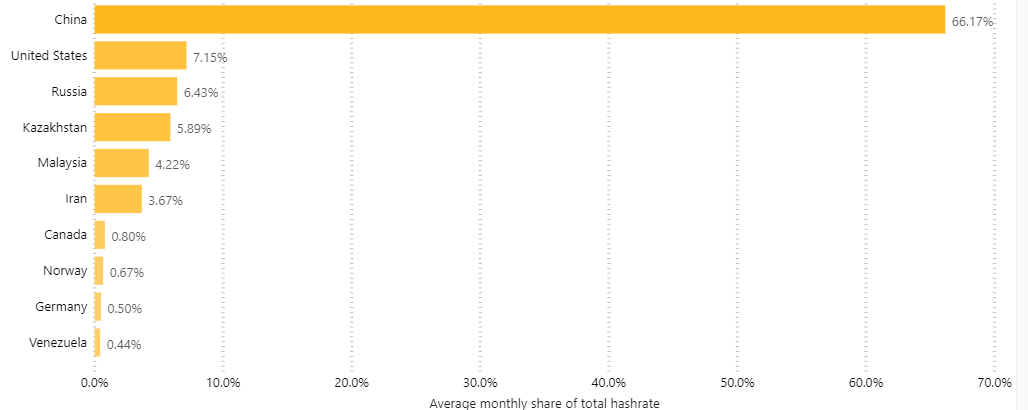

In [9]:
Image("CBECI_mining_map.png")

In [565]:
data = {'location': ['China', 'US', 'Russia', 'Kazakhstan', 'Malaysia','Iran','Canada','Norway','Germany'],
        'share': [66.17, 7.15, 6.43, 5.89, 4.22, 3.67, 0.80, 0.67, 0.5],
        'price_wet': [0.035, 0.054, 0.041, 0.052, 0.01, 0.07, 0.058, 0.08, 0.2],
        'price_dry': [0.06, 0.054, 0.041, 0.052, 0.01, 0.07, 0.058, 0.08, 0.2],
        'renewable': [0.90, 0.69, 0.44, 0.12, 0.02, 0, 0.76, 0.99, 0.46]}
CBECI_geography = pd.DataFrame(data).set_index('location')
CBECI_geography['share'] = CBECI_geography['share']/100 
CBECI_geography['price_wet'] = CBECI_geography['price_wet']
CBECI_geography['price_dry'] = CBECI_geography['price_dry']
CBECI_geography.loc['RoW'] = [1-np.sum(CBECI_geography['share']), 0.084, 0.084, 0.26]
CBECI_geography

,share,price_wet,price_dry,renewable
location,,,,
China,0.6617,0.035,0.060,0.90
US,0.0715,0.054,0.054,0.69
Russia,0.0643,0.041,0.041,0.44
Kazakhstan,0.0589,0.052,0.052,0.12
Malaysia,0.0422,0.010,0.010,0.02
Iran,0.0367,0.070,0.070,0.00
Canada,0.0080,0.058,0.058,0.76
Norway,0.0067,0.080,0.080,0.99
Germany,0.0050,0.200,0.200,0.46


In [567]:
avg_price_wet = np.sum(CBECI_geography['share']*CBECI_geography['price_wet'])
avg_price_dry = np.sum(CBECI_geography['share']*CBECI_geography['price_dry'])
avg_renewable = np.sum(CBECI_geography['share']*CBECI_geography['renewable'])
world_avg_studies = pd.DataFrame({'share':1, 'price_wet': 0.05, 'price_dry': 0.05, 'renewable':avg_renewable},index = ['World'])
world_avg_CBECI = pd.DataFrame({'share':1, 'price_wet': avg_price_wet, 'price_dry': avg_price_dry, 'renewable':avg_renewable_wet},index = ['World'])
world_avg_CBECI

,share,price_wet,price_dry,renewable
World,1,0.041491,0.058033,0.707782


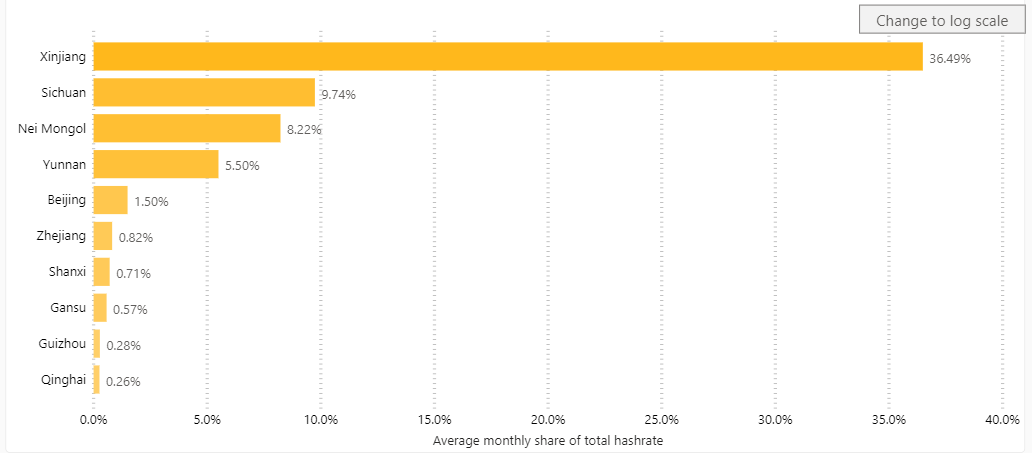

In [12]:
Image("CBECI_mining_map_China.png")

In [612]:
# https://docs.google.com/spreadsheets/d/1SWpxjoYNBVADs7Yc4x85bZvychc8GVXCJlI1lmMYT_4/edit#gid=1054902448
shares = [0.3649,0.0974,0.0822,0.055,0.015]
price_wet = [0.035,0.035,0.035,0.035,0.035]
price_dry = [0.06, 0.06,0.035,0.035,0.035]
renewable = [0.36, 0.90, 0.16, 0.70, 0.08]                                                                           

RoC_share = CBECI_geography.loc['China', 'share'] - np.sum(shares)
china_data = {'location': ['Xinjiang', 'Sichuan', 'Nei Mongol', 'Yunnan', 'Beijing'],
             'share': shares,
             'price_wet': price_wet,
             'price_dry': price_dry,
             'renewable': renewable}    
china_geography = pd.DataFrame(china_data).set_index('location')

china_geography.loc['RoC'] = [RoC_share, 0.035, 0.035, 0.47]
china_geography

,share,price_wet,price_dry,renewable
location,,,,
Xinjiang,0.3649,0.035,0.060,0.36
Sichuan,0.0974,0.035,0.060,0.90
Nei Mongol,0.0822,0.035,0.035,0.16
Yunnan,0.0550,0.035,0.035,0.70
Beijing,0.0150,0.035,0.035,0.08
RoC,0.0472,0.035,0.035,0.47


In [613]:
total_geography = CBECI_geography.append(china_geography).drop('China').sort_values(by='share', ascending=False)
total_geography

,share,price_wet,price_dry,renewable
location,,,,
Xinjiang,0.3649,0.035,0.060,0.36
Sichuan,0.0974,0.035,0.060,0.90
Nei Mongol,0.0822,0.035,0.035,0.16
US,0.0715,0.054,0.054,0.69
Russia,0.0643,0.041,0.041,0.44
Kazakhstan,0.0589,0.052,0.052,0.12
Yunnan,0.0550,0.035,0.035,0.70
RoC,0.0472,0.035,0.035,0.47
RoW,0.0450,0.084,0.084,0.26


In [614]:
avg_elec_price_wet = np.sum(total_geography.share*total_geography.price_wet)
avg_elec_price_dry = np.sum(total_geography.share*total_geography.price_dry)
avg_geography = pd.DataFrame({'share':1, 'wet_price':avg_elec_price_wet, 'dry_price':avg_elec_price_dry}, index=['world'])
avg_geography

,share,wet_price,dry_price
world,1,0.041491,0.053048


# Hardware based estimation

In this section we make a first estimation based on the most efficient hardware (found online)

## Historical

In [15]:
# Bitcoin forks have the same initial difficulty
bitcoin_forks = ['bitcoin', 'bitcoincash','bitcoinsv', 'litecoincash']

In [16]:
# Functions to go from the nBits to the first hashrate
def hex_to_bits(hex_number):
    if int(hex_number,16) >= 8:
        return 0
    elif int(hex_number,16) >= 4:
        return 1
    elif int(hex_number,16) >= 2:
        return 2
    elif int(hex_number,16) == 1:
        return 3
    else:
        return 4
        
def nBits_to_factor(nBits):
    if nBits[:2] != "0x":
        raise Exception("Wrong format, provide hexadecimal number")
    exp = 8*(int(nBits[:4],16)-3)
    mantisse = nBits[4:]
    i=0
    extra_0 = 0
    while hex_to_bits(mantisse[i]) == 4:
        extra_0 += 4
        i += 1
    extra_0 += hex_to_bits(mantisse[i])
    return 256-exp-4*len(mantisse)+extra_0

In [17]:
def difficulty_factor(coin):
    """
    Enter the difficulty factors used to calculate current hashrate. 
    These values where all found by exploring the first block, documentation or source code. 
    References are kept in separate excell sheet
    """
    if coin.name in bitcoin_forks:
        return 2**32
    if coin.name == 'zcash':
        return 2**13
    if coin.name == 'litecoin' or coin.name == 'monacoin':
        return 2**32
    if coin.name == 'ethereum' or coin.name == 'ethereumclassic':
        return 1
    if coin.name == 'monero':
        return 1 # https://github.com/monero-project/monero/blob/36241552b56b156c08319935baf7afda12deb3c5/src/cryptonote_basic/difficulty.h
    if coin.name == 'dash' or coin.name == 'dogecoin':
        return 2**20
    if coin.name == 'ravencoin':
        return 2**24
    if coin.name == 'horizen':
        return 2**nBits_to_factor("0x1f07ffff")
    if coin.name == 'komodo':
        return 2**nBits_to_factor("0x200f0f0f")
    else:
        return 0

In [491]:
def hardware_based_estimation(data, PUE_dict = std_PUE, moving_avg_difficulty = 1, moving_avg_price=7, growth_factor=1, estimates=False, PUE_fix = True, geography_data = world_avg_studies):
    """
    Function that calculates upper bound, lower bound, estimate and market cap for all data.
    Returns a list, each entry is the bounds for one day
    """
    bounds = []
    difficulties = pd.DataFrame()
    prices = pd.DataFrame()
    for i in range(len(data)):
        data_day = data[i]
        found_data = data_day[~data_day.isnull().any(axis=1)].copy()
        
        # Fill in original difficulties
        found_data['difficulty_factor'] = found_data.apply(lambda x: difficulty_factor(x), axis=1)
        found_missing_difficulty = found_data[found_data['difficulty_factor']!=0].copy()

        # Calculate moving avg of difficulty
        difficulties[i] = found_missing_difficulty['difficulty']
        found_missing_difficulty['difficulty_MA'] = difficulties[range(max(i-moving_avg_difficulty+1,0),i+1)].mean(axis=1)
    
        # Calculate moving avg of price
        prices[i] = found_missing_difficulty['price']*growth_factor
        found_missing_difficulty['price_MA'] = prices[range(max(i-moving_avg_price+1,0),i+1)].mean(axis=1)

        # Calculate nethash
        found_missing_difficulty['nethash_calc'] = found_missing_difficulty['difficulty_MA']*found_missing_difficulty['difficulty_factor']/found_missing_difficulty['block_time'] # amount of hashes per second

        result = pd.DataFrame(index= found_missing_difficulty.index,columns=['lower_bound', 'upper_bound', 'estimate', 'estimate_weighted', 'estimate_breakeven']).fillna(0)
        
        for _, l in geography_data.iterrows():
            if dates[i].month in wet_months:
                elec_price = l['price_wet']
            else:
                elec_price = l['price_dry']  
                
                
            # Create dictionairy that maps coins to their profitable hardware
            lower_prof_hardware = dict(found_missing_difficulty.apply(lambda x: create_profitable_set(x, PUE_dict,"lower",PUE_fix, elec_price), axis = 1))
            upper_prof_hardware = dict(found_missing_difficulty.apply(lambda x: create_profitable_set(x, PUE_dict,"upper",PUE_fix, elec_price), axis = 1))
            estimate_prof_hardware = dict(found_missing_difficulty.apply(lambda x: create_profitable_set(x, PUE_dict,"estimate",PUE_fix, elec_price), axis = 1))
                                                    
            result['lower_bound'] += found_missing_difficulty.apply(lambda x: calc_bound(x, l['share'],lower_prof_hardware, True),axis=1)
            result['upper_bound'] += found_missing_difficulty.apply(lambda x: calc_bound(x, l['share'],upper_prof_hardware, False),axis=1)
            result['estimate'] += found_missing_difficulty.apply(lambda x: calc_estimate(x, l['share'],estimate_prof_hardware),axis=1)

            if estimates:
                result['estimate_weighted'] += found_missing_difficulty.apply(lambda x: calc_estimate_weighted(x, l['share'],estimate_prof_hardware),axis=1)
                result['estimate_breakeven'] += found_missing_difficulty.apply(lambda x: calc_estimate_breakeven(x, l['share'],estimate_prof_hardware, electricity_price=elec_price),axis=1)

        result['market_cap'] = found_missing_difficulty['market_cap']
        result = result[result['estimate'] != 0]
        
        bounds.append(result.copy())
    
    return bounds

In [19]:
def calc_hardware_bounds(bounds, PUE_dict = std_PUE):
    """
    Adds the PUE and sums over all coins
    """
    hardware_bounds = {'upper': [], 'lower': [], 'estimate': [], 'market_cap': []}    
    for bounds_day in bounds:
        lower_bound = np.sum(bounds_day['lower_bound'])*PUE_dict['lower']
        estimate = np.sum(bounds_day['estimate'])*PUE_dict['estimate']
        upper_bound = np.sum(bounds_day['upper_bound'])*PUE_dict['upper']
        market_cap = np.sum(bounds_day['market_cap'])
        
        hardware_bounds['lower'].append(lower_bound)
        hardware_bounds['estimate'].append(estimate)
        hardware_bounds['upper'].append(upper_bound)
        hardware_bounds['market_cap'].append(market_cap)

    return hardware_bounds

## Hardware profitability threshold

Here we make our estimation more accurate by investigating entire hardware datasets (created in hardware.ipynb).

In [20]:
SHA256_hardware = pd.read_csv(HARDWARE_PATH+'SHA256_hardware_clean.csv',index_col=0)
ethash_hardware = pd.read_csv(HARDWARE_PATH+'ethash_hardware_clean.csv',index_col=0)
equihash_hardware = pd.read_csv(HARDWARE_PATH+'equihash_hardware_clean.csv',index_col=0)
scrypt_hardware = pd.read_csv(HARDWARE_PATH+'scrypt_hardware_clean.csv',index_col=0)

# Create dict of algorithms with their hardware
algorithm_hardware = {'SHA-256':SHA256_hardware,'Ethash':ethash_hardware, 'Equihash':equihash_hardware, 'Scrypt':scrypt_hardware}

In [21]:
def calc_profitability_threshold(coin, PUE, elec_price):
    if 'price_MA' in coin:
        reward_per_sec = coin['price_MA']*coin['block_reward']/coin['block_time']
    else:
        reward_per_sec = coin['price']*coin['block_reward']/coin['block_time']
    rev = reward_per_sec/coin['nethash_calc'] #$/h
    cost = elec_price/kWh_to_J
    return rev/(cost*PUE)

def is_profitable(coin, hardware, PUE=1, elec_price = avg_price_wet):
    profitability_threshold = calc_profitability_threshold(coin, PUE, elec_price)
    # consumption is J/h, if smaller, more efficient
    if hardware['consumption'] < profitability_threshold:
        return True
    else:
        return False

In [22]:
def create_profitable_set(coin, PUE_dict, bound, PUE_fix, electricity_price):
    if coin.algorithm in algorithm_hardware:
        hardware = algorithm_hardware[coin.algorithm]
        if bound == "lower":
            prof_hardware = hardware[hardware.apply(lambda x: is_profitable(coin,x, PUE_dict['lower'], electricity_price),axis=1)]
        elif bound == "upper":
            prof_hardware = hardware[hardware.apply(lambda x: is_profitable(coin,x, PUE_dict['upper'], electricity_price),axis=1)]
        else:
            prof_hardware = hardware[hardware.apply(lambda x: is_profitable(coin,x, PUE_dict['estimate'], electricity_price),axis=1)]
        if prof_hardware.empty and PUE_fix:
            prof_hardware = hardware[hardware.consumption == hardware.consumption.min()]
        return prof_hardware
    return pd.DataFrame()

## Results

### bounds

In [23]:
def calc_bound(coin, hashrate_share, coin_prof_hardware_dict, lower):
    """
    Returns a lower or upper bound on the electricity consumption of cryptocoins in W
    To put Wh per year, multiply by hours_in_year
    """
    if coin.name not in coin_prof_hardware_dict:
        #print(f"Error, no hardware for {coin.name}")
        return 0
    if coin_prof_hardware_dict[coin.name].empty:
        #print(f"Error, no profitable hardware for {coin.name}")
        return 0
    hardware = coin_prof_hardware_dict[coin.name].sort_values(by='consumption', ascending=lower).iloc[0]
    electricity_consumption = hardware['consumption']*coin['nethash_calc']*hashrate_share
    return electricity_consumption*W_to_TWh

### Estimate

In [24]:
def calc_estimate(coin, hashrate_share, coin_prof_hardware_dict):
    """
    Returns an on the electricity consumption of cryptocoins in W
    To put Wh per year, multiply by hours_in_year
    """
    if coin.name not in coin_prof_hardware_dict:
        #print(f"Error, no hardware for {coin.name}")
        return 0
    if coin_prof_hardware_dict[coin.name].empty:
        #print(f"Error, no profitable hardware for {coin.name}")
        return 0
    prof_hardware = coin_prof_hardware_dict[coin.name]
    num_prof_hardware = prof_hardware.shape[0]
    hashrate_part = coin['nethash_calc']*hashrate_share/num_prof_hardware
    
    electricity_consumption = prof_hardware['consumption']*hashrate_part
    
    return np.sum(electricity_consumption)*W_to_TWh 

## Manual investigation

In [616]:
# All profitable hardware
bitcoin_profitable = set()
ethereum_profitable = set()
for data_day in data_hist:
    found_data = data_day[~data_day.isnull().any(axis=1)].copy()
    # Fill in original difficulties
    found_data['difficulty_factor'] = found_data.apply(lambda x: difficulty_factor(x), axis=1)
    found_missing_difficulty = found_data[found_data['difficulty_factor']!=0].copy()
    # Calculate nethash
    found_missing_difficulty['nethash_calc'] = found_missing_difficulty['difficulty']*found_missing_difficulty['difficulty_factor']/found_missing_difficulty['block_time'] # amount of hashes per second
    
    prof_hardware_bitcoin = create_profitable_set(found_missing_difficulty.loc['bitcoin'], std_PUE, 'estimate', False, avg_price_wet)
    prof_hardware_ethereum = create_profitable_set(found_missing_difficulty.loc['ethereum'], std_PUE, 'estimate', False, avg_price_wet)
    
    bitcoin_profitable = bitcoin_profitable | set(prof_hardware_bitcoin['name'])
    ethereum_profitable = ethereum_profitable | set(prof_hardware_ethereum['name'])

In [617]:
pd.DataFrame(list(bitcoin_profitable), columns=['name']).to_csv('bitcoin_prof_hardware.csv', encoding='utf-16')
pd.DataFrame(list(ethereum_profitable), columns=['name']).to_csv('ethereum_prof_hardware.csv', encoding='utf-16')

In [618]:
bitcoin_profitable

{'ASICminer 8 Nano 44Th',
 'ASICminer 8 Nano Pro',
 'ASICminer 8 Nano S 58Th',
 'Aladdin Miner 16Th/s Bitcoin',
 'Bitfily Snow Panther A1',
 'Bitfily Snow Panther B1',
 'Bitfily Snow Panther B1+',
 'Bitfury B8',
 'Bitfury Tardis',
 'Bitmain Antminer R4',
 'Bitmain Antminer S11 (20.5Th)',
 'Bitmain Antminer S17 (53Th)',
 'Bitmain Antminer S17 (56Th)',
 'Bitmain Antminer S17 Pro (50Th)',
 'Bitmain Antminer S17 Pro (53Th)',
 'Bitmain Antminer S19 (95Th)',
 'Bitmain Antminer S19 Pro (110Th)',
 'Bitmain Antminer S9 (11.5Th)',
 'Bitmain Antminer S9 (12.5Th)',
 'Bitmain Antminer S9 (13.5Th)',
 'Bitmain Antminer S9 (13Th)',
 'Bitmain Antminer S9 (14Th)',
 'Bitmain Antminer S9 Hydro (18Th)',
 'Bitmain Antminer S9i (13.5Th)',
 'Bitmain Antminer S9i (13Th)',
 'Bitmain Antminer S9i (14Th)',
 'Bitmain Antminer S9j (14.5Th)',
 'Bitmain Antminer T17 (40Th)',
 'Bitmain Antminer T9 (11.5Th)',
 'Bitmain Antminer T9 (12.5Th)',
 'Bitmain Antminer T9+ (10.5Th)',
 'Bitmain\xa0Antminer S17+',
 'Bitmain\xa0An

# Revenue based estimation

In [370]:
def revenue_based_estimation(data, geography_data, moving_avg = 1):
    """ 
    Returns the electricity use (in Watts) if 100% of revenues are used for electricity costs
    """
    bounds = []
    prices = pd.DataFrame()
    for i in range(len(data)):
        data_day = data[i]
        revenue_data = data_day[['#', 'market_cap', 'price', 'block_time', 'block_reward']].copy()
        
        # Calculate moving avg of price
        prices[i] = revenue_data['price']
        revenue_data['price_MA'] = prices[range(max(i-moving_avg+1,0),i+1)].mean(axis=1)
        
        revenue_data = revenue_data[~revenue_data.isnull().any(axis=1)].copy()
        revenue_data['revenue_per_sec'] = revenue_data['price_MA']*revenue_data['block_reward']/revenue_data['block_time']
        
        if dates[i].month in wet_months:
            elec_price = geography_data.loc['World','price_wet']
        else:
            elec_price = geography_data.loc['World','price_dry']
            
        revenue_data['estimate'] = revenue_data['revenue_per_sec']/elec_price*seconds_in_year/10**9
        revenue_data['upper_bound'] = revenue_data['revenue_per_sec']/elec_price*seconds_in_year/10**9
        
        bounds.append(revenue_data[['estimate','upper_bound', 'market_cap']])
        
    return bounds

In [28]:
def calc_revenue_bounds(bounds, revenue_percent = 0.60):
    revenue_bounds = {'upper': [], 'lower': [], 'estimate': [], 'market_cap': []}    
    for bounds_day in bounds:
        
        upper_bound = np.sum(bounds_day['upper_bound'])
        estimate = np.sum(bounds_day['estimate'])
        market_cap = np.sum(bounds_day['market_cap'])
        
        revenue_bounds['upper'].append(upper_bound)
        revenue_bounds['estimate'].append(estimate*revenue_percent)
        revenue_bounds['market_cap'].append(market_cap)
    
    return revenue_bounds

# Results

## Hardware based

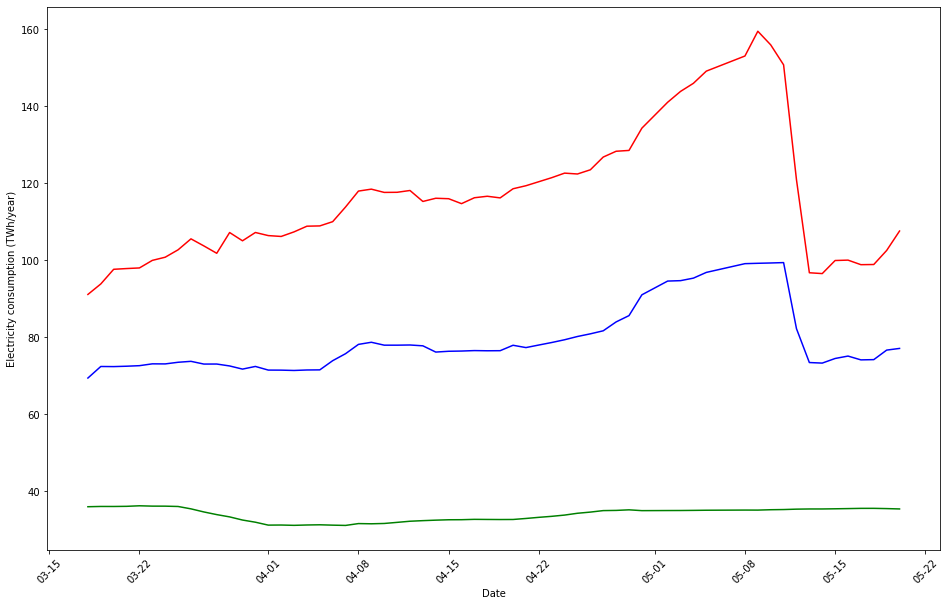

In [337]:
# Get hardware bounds
std_PUE = {'lower': 1.1, 'estimate': 1.1, 'upper':1.1}
hardware_bounds_coin = hardware_based_estimation(data_hist)
hardware_bounds_total = calc_hardware_bounds(hardware_bounds_coin)
plt.figure(figsize=(16,10))
plt.plot(dates, hardware_bounds_total['lower'], color='green')
plt.plot(dates, hardware_bounds_total['estimate'], color='blue')
plt.plot(dates, hardware_bounds_total['upper'], color='red')
plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)")
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(date_form)
plt.show()

## Revenue based

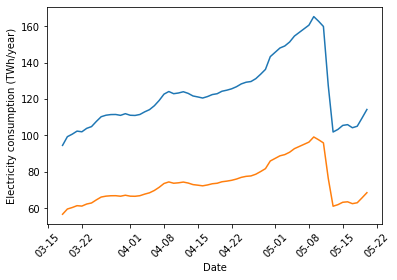

In [373]:
# Get revenue bounds
revenue_bounds_coin = revenue_based_estimation(data_hist, world_avg_studies, moving_avg=7)
revenue_bounds_total = calc_revenue_bounds(revenue_bounds_coin, revenue_percent)
plt.plot(dates, revenue_bounds_total['upper'])
plt.plot(dates, revenue_bounds_total['estimate'])
plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)")
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(date_form)
plt.show()

In [374]:
np.mean([revenue_bounds_coin[i].shape[0] for i in range(len(revenue_bounds_coin))])

31.688524590163933

## Investigate

In [339]:
# Get market cap of the used data
hardware_market_cap_hist = pd.Series(hardware_bounds_total['market_cap'])
# Get total market cap of data
total_market_cap_hist = pd.Series(revenue_bounds_total['market_cap'])

In [340]:
# Average bounds and market cap over dates per coin
coin_hardware_date = {'lower_bound': pd.DataFrame(), 'upper_bound': pd.DataFrame(), 'estimate': pd.DataFrame(), 'market_cap': pd.DataFrame()}

for i, data_day in enumerate(hardware_bounds_coin):
    coin_hardware_date['lower_bound'][i] = data_day['lower_bound']
    coin_hardware_date['upper_bound'][i] = data_day['upper_bound']
    coin_hardware_date['estimate'][i] = data_day['estimate']
    coin_hardware_date['market_cap'][i] = data_day['market_cap']

coin_hardware_avg = {}

for bound, data in coin_hardware_date.items():
    coin_hardware_avg[bound] = data.mean(axis=1)  

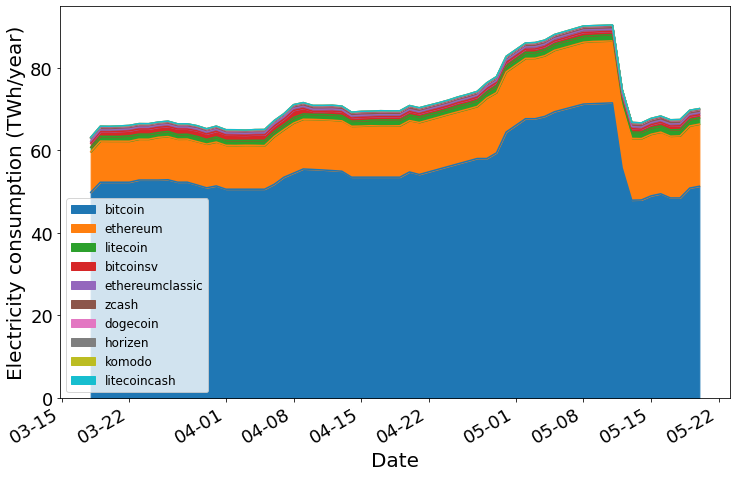

In [391]:
coin_hardware_date['estimate'].columns = dates
coin_hardware_date['estimate'].transpose().plot.area(figsize=(12,8))
plt.ylabel("Electricity consumption (TWh/year)", size=20)
plt.xlabel("Date", size=20)
plt.legend(prop={"size":12})
plt.gca().xaxis.set_major_formatter(date_form)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.savefig(FIG_PATH+'basic_contributions.png')
plt.show()

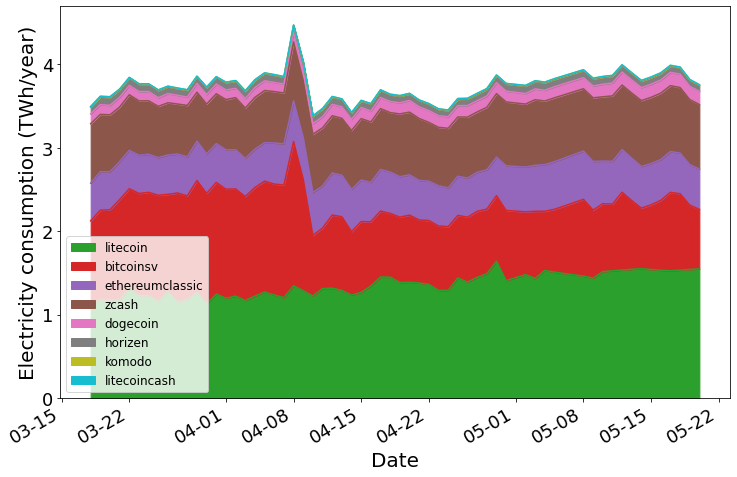

In [392]:
coin_hardware_date['estimate'].columns = dates
coin_hardware_date['estimate'].drop(['bitcoin', 'ethereum']).transpose().plot.area(figsize=(12,8), color=['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])
plt.ylabel("Electricity consumption (TWh/year)", size=20)
plt.xlabel("Date", size=20)
plt.legend(prop={"size":12})
plt.gca().xaxis.set_major_formatter(date_form)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.savefig(FIG_PATH+'basic_contributions_zoom.png')
plt.show()

In [342]:
bitcoin_contributions = coin_hardware_date['estimate'].loc['bitcoin']/np.sum(coin_hardware_date['estimate'])
print(f"The contribution of bitcoin to the total is minimum {np.min(bitcoin_contributions)}, maximum {np.max(bitcoin_contributions)}\
and on average {np.mean(bitcoin_contributions)}%")

ethereum_contributions = coin_hardware_date['estimate'].loc['ethereum']/np.sum(coin_hardware_date['estimate'])
print(f"The contribution of ethereum to the total is minimum {np.min(ethereum_contributions)}, maximum {np.max(ethereum_contributions)}\
and on average {np.mean(ethereum_contributions)}%")

bit_eth_contributions = bitcoin_contributions+ethereum_contributions
print(f"The contribution of ethereum and bitcoin to the total is minimum {np.min(bit_eth_contributions)}, maximum {np.max(bit_eth_contributions)}\
and on average {np.mean(bit_eth_contributions)}%")

The contribution of bitcoin to the total is minimum 0.7175802052208291, maximum 0.7944736113814826and on average 0.7721736989667655%
The contribution of ethereum to the total is minimum 0.14887610405611107, maximum 0.2240684417036654and on average 0.1751104398539814%
The contribution of ethereum and bitcoin to the total is minimum 0.9371085210077352, maximum 0.9575292713904809and on average 0.9472841388207468%


## Extrapolation

### Market share

First calculate what part of top100 mineable and of total market cap we capture with our data

In [343]:
hardware_data_market = hardware_market_cap_hist/total_market_cap_hist
print(f'The hardware based estimation represents minimum {round(hardware_data_market.min(),3)*100}%, maximum {round(hardware_data_market.max(),4)*100}%\n\
 and on average {round(hardware_data_market.mean(),3)*100}% of the market cap of the mineable top 100')

The hardware based estimation represents minimum 98.4%, maximum 98.67%
 and on average 98.5% of the market cap of the mineable top 100


In [344]:
# Data of 21/04/2020
mineable_market_cap_hist = pd.read_csv(DATA_PATH+'mineable_all.csv')
mineable_market_cap_hist = mineable_market_cap_hist['market_cap'].apply(clean_int)
mineable_market_cap_sum = mineable_market_cap_hist.sum()
hardware_mineable_share = hardware_market_cap_hist[34]/mineable_market_cap_sum
print(f'This is {round(hardware_mineable_share,4)*100}% of the total mineable market cap on 21/04/2020')

This is 94.14% of the total mineable market cap on 21/04/2020


This means that, if our hypothesis is correct, we can divide our result bij 0.95 to get the total energy consumption of the mineable market

In [345]:
# Get total market cap from https://p.nomics.com/cryptocurrency-bitcoin-api
url = "https://api.nomics.com/v1/market-cap/history?key=demo-26240835858194712a4f8cc0dc635c7a&start=2020-03-18T00%3A00%3A00Z"
total_market_cap_hist = pd.DataFrame(json.loads(urllib.request.urlopen(url).read()))['market_cap'].astype(float)
hardware_data_share_total = hardware_market_cap_hist/total_market_cap_hist

print(f'This is minimum {round(hardware_data_share_total.min(),4)*100}%, maximum {round(hardware_data_share_total.max(),4)*100}%\
 and on average {round(hardware_data_share_total.mean(),3)*100}% of the total market cap')

This is minimum 69.44%, maximum 84.99% and on average 76.9% of the total market cap


### Hypothesis testing

In [346]:
market_cap_mean = coin_hardware_avg['market_cap']
energy_consumption_mean = coin_hardware_avg['estimate']

In [347]:
found_data_energy = pd.concat([energy_consumption_mean,market_cap_mean],axis=1, keys=["energy_consumption", "market_cap"])
# Drop 0 values
found_data_energy = found_data_energy[found_data_energy['energy_consumption'] != 0]

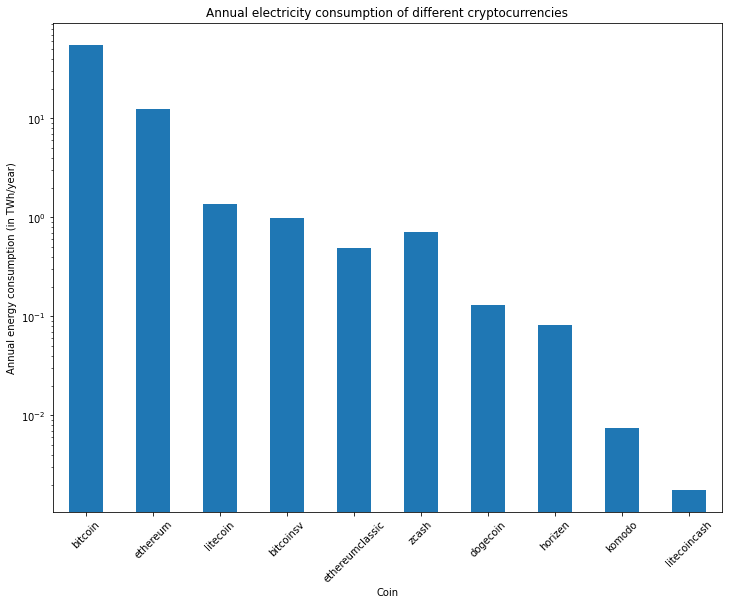

In [348]:
plt.figure(figsize=(12,9))

found_data_energy['energy_consumption'].plot(kind='bar')
plt.yscale('log')
plt.xticks(rotation=45)
plt.ylabel('Annual energy consumption (in TWh/year)')
plt.xlabel('Coin')
plt.title('Annual electricity consumption of different cryptocurrencies')
plt.show()

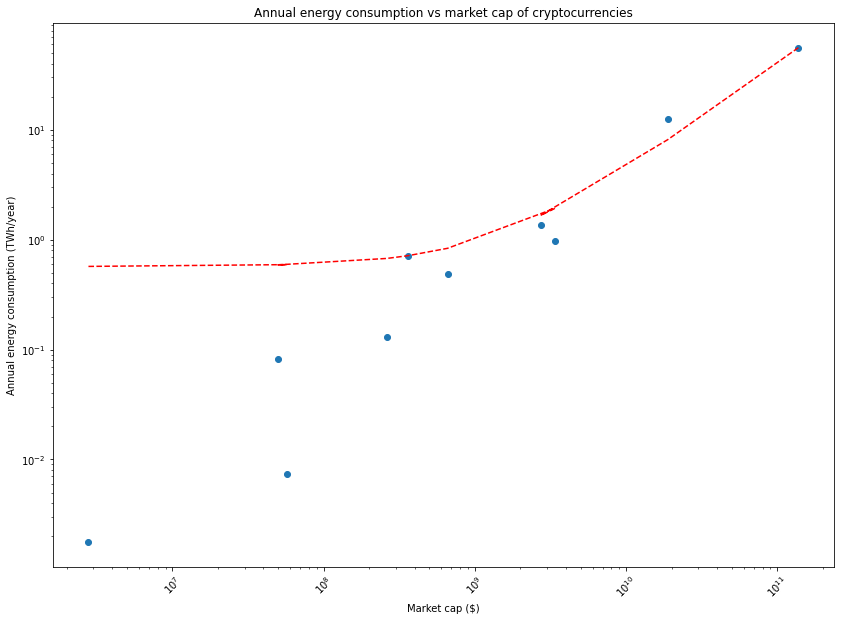

In [349]:
plt.figure(figsize=(14,10))

plt.scatter(found_data_energy['market_cap'],found_data_energy['energy_consumption'])
z = np.polyfit(found_data_energy['market_cap'],found_data_energy['energy_consumption'], 1)
p = np.poly1d(z)
x = found_data_energy['market_cap']
y = z[0]*x+z[1]
plt.plot(found_data_energy['market_cap'],p(found_data_energy['market_cap']),"r--")
#plt.plot(x,y, "b--")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Market cap ($)')
plt.ylabel('Annual energy consumption (TWh/year)')
plt.xticks(rotation=45)
plt.title('Annual energy consumption vs market cap of cryptocurrencies')
plt.show()

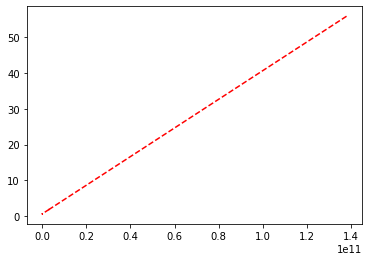

In [350]:
x = found_data_energy['market_cap']
y = z[0]*x+z[1]
plt.plot(x,y,"r--")

## Combining all results

- Hardware based
- Revenue based
- BECI
- CBECI

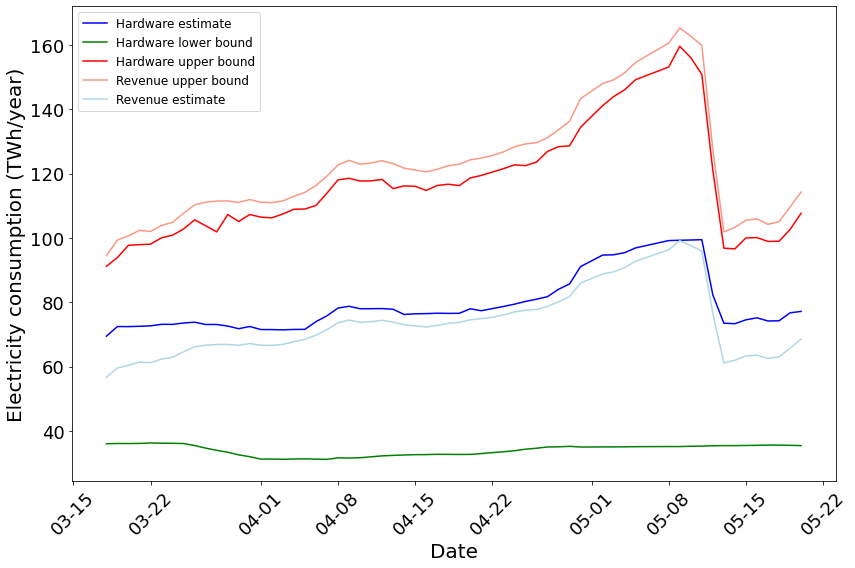

In [375]:
plt.figure(figsize=(12,8))
plt.plot(dates, hardware_bounds_total['estimate'], label="Hardware estimate", color="blue")
plt.plot(dates, hardware_bounds_total['lower'], label="Hardware lower bound",color="green")
plt.plot(dates, hardware_bounds_total['upper'], label="Hardware upper bound", color="red")
plt.plot(dates, revenue_bounds_total['upper'], label="Revenue upper bound", color="#FA9883")
plt.plot(dates, revenue_bounds_total['estimate'], label="Revenue estimate", color="lightblue")
plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)", size=20)
plt.xlabel("Date", size=20)
plt.legend(prop={"size":12})
plt.gca().xaxis.set_major_formatter(date_form)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.tight_layout()
plt.savefig(FIG_PATH+'basic_results.png')
plt.show()

### Mean consumption

In [93]:
print(np.mean(hardware_bounds_total['lower']))
print(np.mean(hardware_bounds_total['estimate']))
print(np.mean(hardware_bounds_total['upper']))

33.98901155047559
78.78655054638625
115.83266893287004


### Compare to bitcoin values

In [47]:
bitcoin_price = [data.loc['bitcoin','price'] for data in data_hist]
bitcoin_difficulty = [data.loc['bitcoin', 'difficulty'] for data in data_hist]

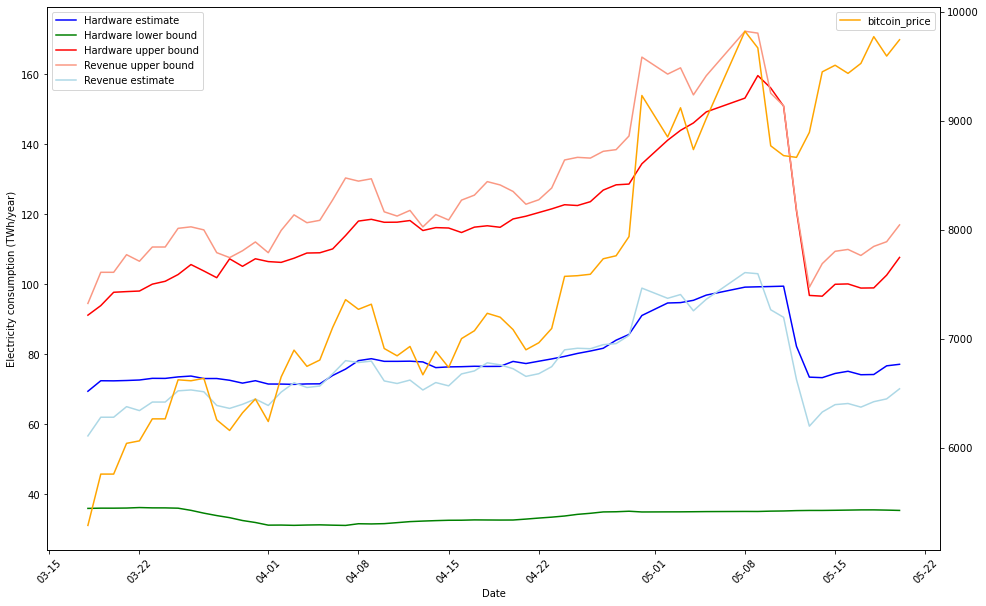

In [48]:
fig, ax1 = plt.subplots(figsize=(16,10))

ax1.plot(dates, hardware_bounds_total['estimate'], label="Hardware estimate", color="blue")
ax1.plot(dates, hardware_bounds_total['lower'], label="Hardware lower bound",color="green")
ax1.plot(dates, hardware_bounds_total['upper'], label="Hardware upper bound", color="red")
ax1.plot(dates, revenue_bounds_total['upper'], label="Revenue upper bound", color="#FA9883")
ax1.plot(dates, revenue_bounds_total['estimate'], label="Revenue estimate", color="lightblue")
plt.xticks(rotation=45)
ax1.set_ylabel("Electricity consumption (TWh/year)")
ax1.set_xlabel("Date")
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(dates, bitcoin_price, label="bitcoin_price", color="orange")
ax2.legend(loc=1)
plt.gca().xaxis.set_major_formatter(date_form)
plt.show()

# Parameters

## Growth factor

### historical 

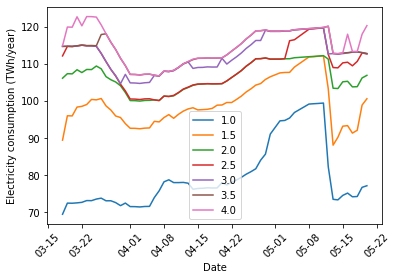

In [50]:
# Get hardware bounds
for i in np.linspace(1,4, num=7):
    hardware_bounds_coin_growth = hardware_based_estimation(data_hist, growth_factor=i)
    hardware_bounds_total_growth = calc_hardware_bounds(hardware_bounds_coin_growth)
    #plt.plot(dates, hardware_bounds_total_growth['lower'])
    plt.plot(dates, hardware_bounds_total_growth['estimate'], label=i)
    #plt.plot(dates, hardware_bounds_total_growth['upper'])
plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)")
plt.xlabel("Date")
plt.legend()
plt.gca().xaxis.set_major_formatter(date_form)
plt.show()

### daily

In [255]:
min_growth = 0.5
max_growth = 2.5

In [262]:
growth_day_dict = {}
for growth in np.linspace(min_growth, max_growth, num=10):
    hardware_bounds = hardware_based_estimation([data_hist[0]], growth_factor=growth)
    growth_day_dict[growth] = calc_hardware_bounds(hardware_bounds)['estimate']

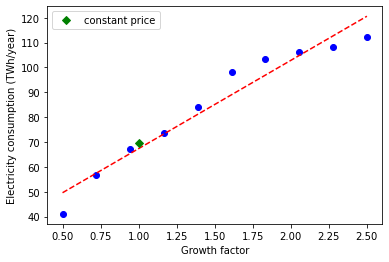

In [263]:
x, y = list(growth_day_dict.keys()), np.squeeze(list(growth_day_dict.values()))
plt.plot(x,y, 'bo')

z = np.polyfit(x,y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

hardware_bounds = hardware_based_estimation([data_hist[0]])
growth_day_dict['1'] = calc_hardware_bounds(hardware_bounds)['estimate']

plt.plot(1, growth_day_dict['1'], 'gD', label='constant price')    

plt.ylabel("Electricity consumption (TWh/year)")
plt.xlabel("Growth factor")
plt.legend()    
plt.show()

## PUE

### Historical

In [529]:
pue_hist_dict = {}

for estimate_PUE in [1, 1.04, 1.1, 1.20, 1.30, 1.60]:
    PUE = {'lower':1,'estimate':estimate_PUE,'upper':1.20}
    hardware_PUE_coin = hardware_based_estimation(data_hist, PUE_dict = PUE,PUE_fix=False)
    hardware_PUE_total = calc_hardware_bounds(hardware_PUE_coin, PUE_dict = PUE)
    pue_hist_dict[estimate_PUE] = hardware_PUE_total['estimate']

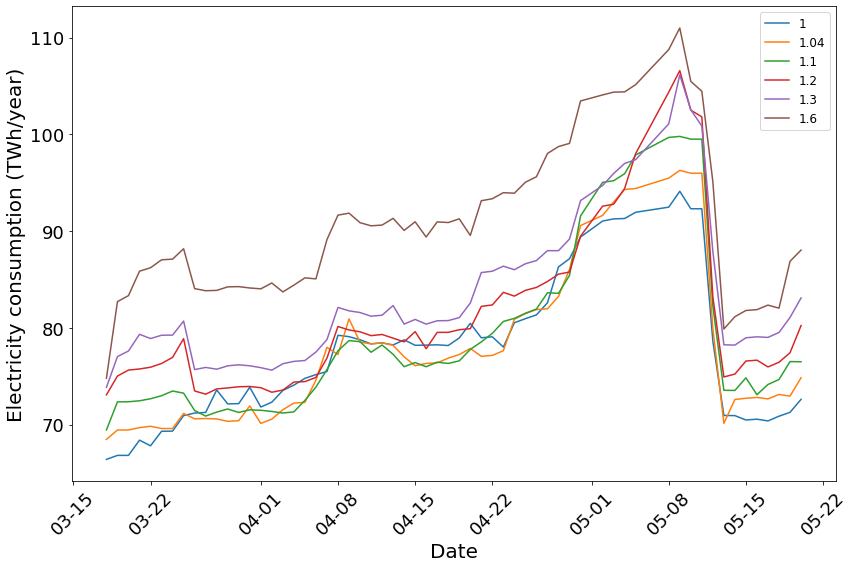

In [530]:
plt.figure(figsize=(12,8))
for pue, consumption in pue_hist_dict.items():
    plt.plot(dates, consumption, label=pue)

plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)", size=20)
plt.xlabel("Date", size = 20)
plt.legend(prop={"size":12})
plt.gca().xaxis.set_major_formatter(date_form)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.tight_layout()
plt.savefig(FIG_PATH+'PUE.png')
plt.show()

### Daily, relation

In [520]:
min_pue = 1
max_pue = 1.3

In [521]:
pue_day_dict = {}
for pue_estimate in np.linspace(min_pue, max_pue, num=10):
    PUE = {'lower':1,'estimate':pue_estimate,'upper':1.20}
    hardware_bounds = hardware_based_estimation(data_hist[:dry_dates], PUE_dict=PUE)
    average = sum(hardware_bounds)/len(hardware_bounds)
    pue_day_dict[pue_estimate] = calc_hardware_bounds([average],PUE_dict=PUE)['estimate']

In [525]:
PUE_estimated = {'lower':1,'estimate':1.1,'upper':1.20}
hardware_bounds = hardware_based_estimation(data_hist[:dry_dates], PUE_dict=PUE_estimated)
average = sum(hardware_bounds)/len(hardware_bounds)
pue_estimated_consumption = calc_hardware_bounds([average],PUE_dict=PUE_estimated)['estimate']

PUE_lowest = {'lower':1,'estimate':1.04,'upper':1.20}
hardware_bounds = hardware_based_estimation(data_hist[:dry_dates], PUE_dict=PUE_lowest)
average = sum(hardware_bounds)/len(hardware_bounds)
pue_estimated_lowest = calc_hardware_bounds([average],PUE_dict=PUE_lowest)['estimate']

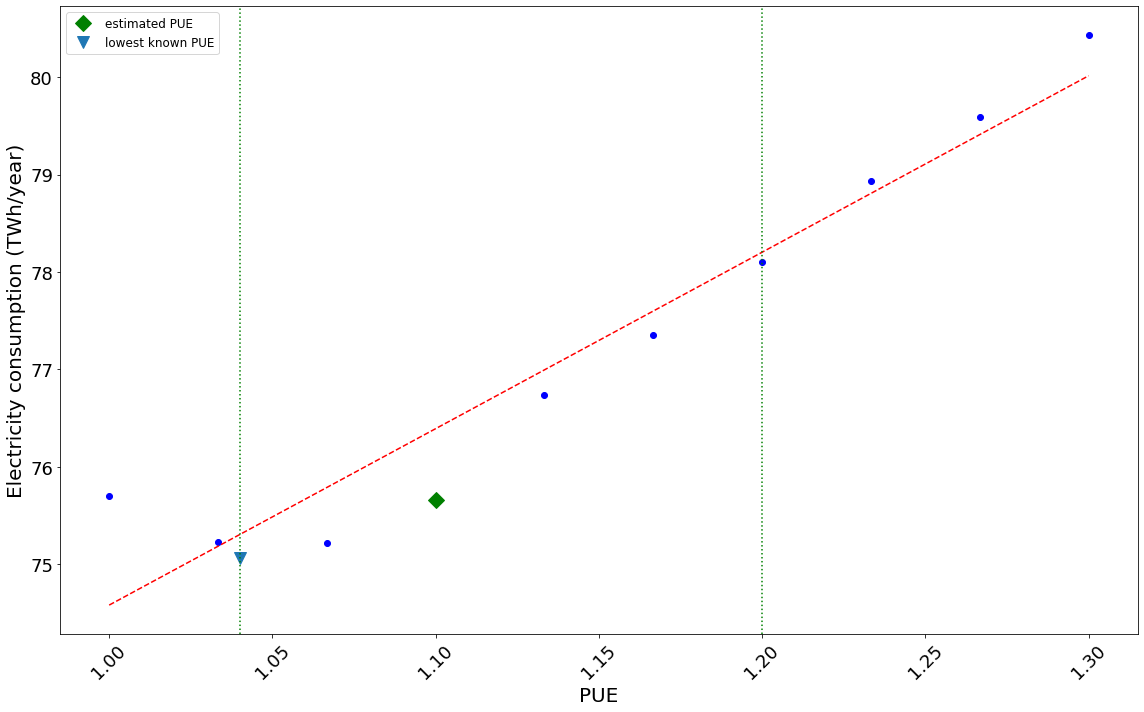

In [533]:
x, y = list(pue_day_dict.keys()), np.squeeze(list(pue_day_dict.values()))

plt.figure(figsize=(16,10))

plt.plot(x,y, 'bo')

z = np.polyfit(x,y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.plot(PUE_estimated['estimate'], pue_estimated_consumption, 'gD', label='estimated PUE', markersize=12)    
plt.plot(PUE_lowest['estimate'], pue_estimated_lowest, 'v', label='lowest known PUE', markersize=12)

plt.axvline(1.04, color='green', ls=':')
plt.axvline(1.20, color='green', ls=':')

plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)", size=20)
plt.xlabel("PUE", size = 20)
plt.legend(prop={"size":12})
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.tight_layout()
plt.savefig(FIG_PATH+'PUE_daily.png')
plt.show()

## Electricity cost (geography)

### Seasonal

In [397]:
hardware_bounds_avg = hardware_based_estimation(data_hist, geography_data = world_avg_studies)
hardware_bounds_avg_total = calc_hardware_bounds(hardware_bounds_coin)

hardware_bounds_seasonal = hardware_based_estimation(data_hist, geography_data = CBECI_geography)
hardware_bounds_seasonal_total = calc_hardware_bounds(hardware_bounds_seasonal)

In [398]:
revenue_bounds_studies = revenue_based_estimation(data_hist, world_avg_studies)
revenue_bounds_studies_total = calc_revenue_bounds(revenue_bounds_studies, revenue_percent)

revenue_bounds_seasonal = revenue_based_estimation(data_hist, world_avg_CBECI)
revenue_bounds_seasonal_total = calc_revenue_bounds(revenue_bounds_seasonal, revenue_percent)

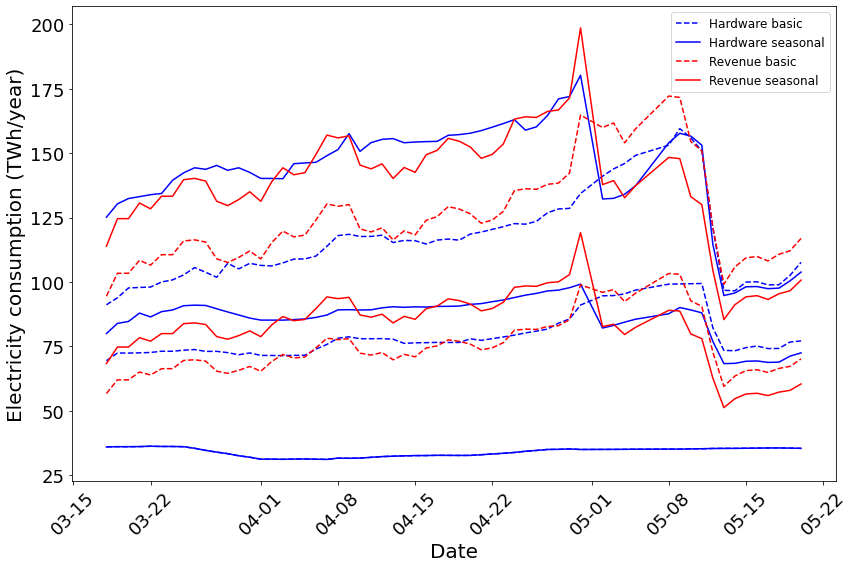

In [507]:
plt.figure(figsize=(12,8))

plt.plot(dates, hardware_bounds_avg_total['lower'], linestyle='--', label='Hardware basic',color='blue')
plt.plot(dates, hardware_bounds_avg_total['estimate'], linestyle='--',color='blue')
plt.plot(dates, hardware_bounds_avg_total['upper'], linestyle='--',color='blue')

plt.plot(dates, hardware_bounds_seasonal_total['lower'], label = 'Hardware seasonal', color='blue')
plt.plot(dates, hardware_bounds_seasonal_total['estimate'], color='blue')
plt.plot(dates, hardware_bounds_seasonal_total['upper'], color='blue')

plt.plot(dates, revenue_bounds_studies_total['estimate'], linestyle='--', label = 'Revenue basic', color='red')
plt.plot(dates, revenue_bounds_studies_total['upper'], linestyle='--',color='red')

plt.plot(dates, revenue_bounds_seasonal_total['estimate'], label='Revenue seasonal',color='red')
plt.plot(dates, revenue_bounds_seasonal_total['upper'], color='red')


plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)", size=20)
plt.xlabel("Date", size=20)
plt.legend(prop={"size":12})
plt.gca().xaxis.set_major_formatter(date_form)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.tight_layout()
plt.savefig(FIG_PATH+'seasonality.png')
plt.show()

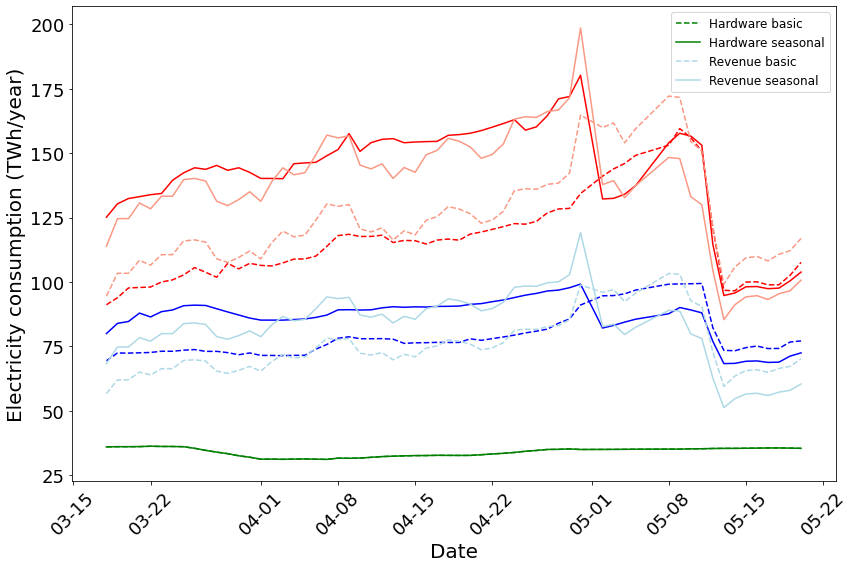

In [506]:
plt.figure(figsize=(12,8))

plt.plot(dates, hardware_bounds_avg_total['lower'], linestyle='--', label='Hardware basic',color='green')
plt.plot(dates, hardware_bounds_avg_total['estimate'], linestyle='--',color='blue')
plt.plot(dates, hardware_bounds_avg_total['upper'], linestyle='--',color='red')

plt.plot(dates, hardware_bounds_seasonal_total['lower'], label = 'Hardware seasonal', color='green')
plt.plot(dates, hardware_bounds_seasonal_total['estimate'], color='blue')
plt.plot(dates, hardware_bounds_seasonal_total['upper'], color='red')

plt.plot(dates, revenue_bounds_studies_total['estimate'], linestyle='--', label = 'Revenue basic', color='lightblue')
plt.plot(dates, revenue_bounds_studies_total['upper'], linestyle='--',color='#FA9883')

plt.plot(dates, revenue_bounds_seasonal_total['estimate'], label='Revenue seasonal',color='lightblue')
plt.plot(dates, revenue_bounds_seasonal_total['upper'], color='#FA9883')


plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)", size=20)
plt.xlabel("Date", size=20)
plt.legend(prop={"size":12})
plt.gca().xaxis.set_major_formatter(date_form)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.tight_layout()
plt.savefig(FIG_PATH+'seasonality.png')
plt.show()

In [146]:
world_avg_CBECI['price_wet']/world_avg_studies['price_wet']
np.mean(hardware_bounds_seasonal_total['estimate'][:43])/np.mean(hardware_bounds_avg_total['estimate'][:43])
np.mean(hardware_bounds_seasonal_total['estimate'][45:])/np.mean(hardware_bounds_avg_total['estimate'][45:])

World    0.895982
Name: price_wet, dtype: float64

### Daily

In [483]:
min_electricity_price = 0.02
max_electricity_price = 0.07

In [484]:
elec_price_dict = {}
for elec_price in np.linspace(min_electricity_price, max_electricity_price, num=20):
    world_avg = pd.DataFrame({'share':1, 'price_wet': elec_price, 'price_dry': elec_price, 'renewable_wet':avg_renewable_wet, 'renewable_dry': avg_renewable_dry},index = ['World'])
    hardware_bounds = hardware_based_estimation(data_hist[:dry_dates], geography_data = world_avg)
    average = sum(hardware_bounds)/len(hardware_bounds)
    elec_price_dict[elec_price] = calc_hardware_bounds([average])['estimate']

In [498]:
avg_consumption_wet_price = sum(hardware_bounds_seasonal_total['estimate'][:dry_dates])/len(hardware_bounds_seasonal_total['estimate'][:dry_dates])

dry_price = pd.DataFrame({'share':1, 'price_wet': avg_price_dry, 'price_dry': avg_price_dry, 'renewable_wet':avg_renewable_wet, 'renewable_dry': avg_renewable_dry},index = ['World'])

hardware_bounds_avg_dry = hardware_based_estimation(data_hist, geography_data = dry_price)
hardware_bounds_avg_dry_total = calc_hardware_bounds(hardware_bounds_avg_dry)
avg_consumption_dry_price = sum(hardware_bounds_avg_dry_total['estimate'][:dry_dates])/len(hardware_bounds_avg_dry_total['estimate'][:dry_dates])

hardware_bounds_avg_study = hardware_based_estimation(data_hist, geography_data = world_avg_studies)
hardware_bounds_avg_study_total = calc_hardware_bounds(hardware_bounds_avg_study)
avg_consumption_study_price = sum(hardware_bounds_avg_study_total['estimate'][:dry_dates])/len(hardware_bounds_avg_study_total['estimate'][:dry_dates])

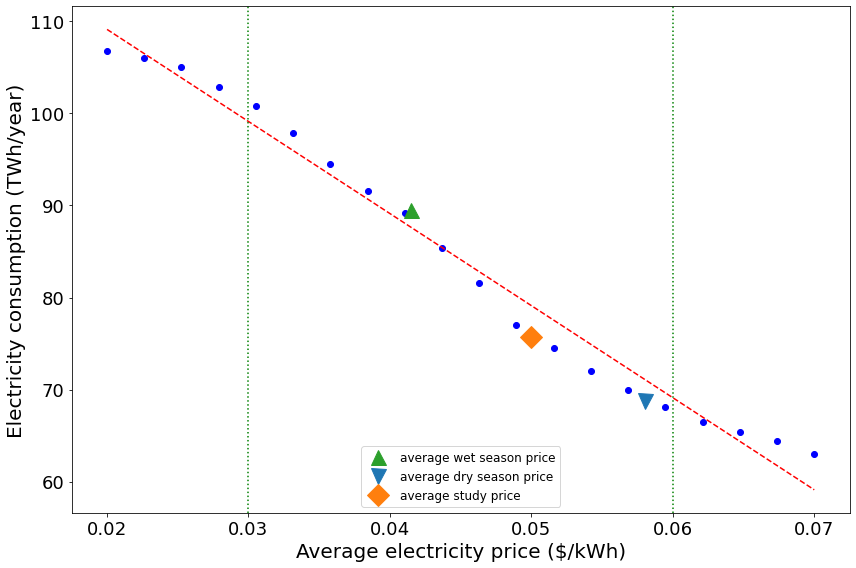

In [504]:
plt.figure(figsize=(12,8))


x, y = list(elec_price_dict.keys()), np.squeeze(list(elec_price_dict.values()))
plt.plot(x,y, 'bo')

z = np.polyfit(x,y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.plot(world_avg_CBECI['price_wet'], avg_consumption_wet_price, '^', label='average wet season price',markersize=15, color='C2') 
plt.plot(world_avg_CBECI['price_dry'], avg_consumption_dry_price, 'v', label='average dry season price',markersize=15) 
plt.plot(world_avg_studies['price_wet'], avg_consumption_study_price, 'D', label='average study price',markersize=15) 


plt.axvline(0.03, color='green', ls=':')
plt.axvline(0.06, color='green', ls=':')

plt.ylabel("Electricity consumption (TWh/year)", size=20)
plt.xlabel("Average electricity price ($/kWh)", size=20)
plt.legend(prop={"size":12})
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.tight_layout()
plt.savefig(FIG_PATH+'price_variation.png')
plt.show()
plt.show()

In [480]:
elec_price_dict_dry = {}
for elec_price in np.linspace(min_electricity_price, max_electricity_price, num=20):
    world_avg = pd.DataFrame({'share':1, 'price_wet': elec_price, 'price_dry': elec_price, 'renewable_wet':avg_renewable_wet, 'renewable_dry': avg_renewable_dry},index = ['World'])
    hardware_bounds = hardware_based_estimation(data_hist[(dry_dates+2):], geography_data = world_avg)
    average = sum(hardware_bounds)/len(hardware_bounds)
    elec_price_dict_dry[elec_price] = calc_hardware_bounds([average])['estimate']

In [481]:
avg_dry_price = sum(hardware_bounds_seasonal_total['estimate'][(dry_dates+1):])/len(hardware_bounds_seasonal_total['estimate'][(dry_dates+1):])

In [214]:
print(f"{round(z[0])}*x+{round(z[1])}")

-1023.0*x+126.0


## Moving average

In [421]:
min_moving_avg = 1
max_moving_avg = 26

In [422]:
moving_avg_dict = {}
for moving_avg in range(min_moving_avg, max_moving_avg, 6):
    hardware_bounds = hardware_based_estimation(data_hist, moving_avg_difficulty = moving_avg, moving_avg_price = moving_avg)
    moving_avg_dict[moving_avg] = calc_hardware_bounds(hardware_bounds)['estimate']

hardware_bounds = hardware_based_estimation(data_hist, moving_avg_difficulty = 7, moving_avg_price = 7)
moving_avg_dict[7] = calc_hardware_bounds(hardware_bounds)['estimate']

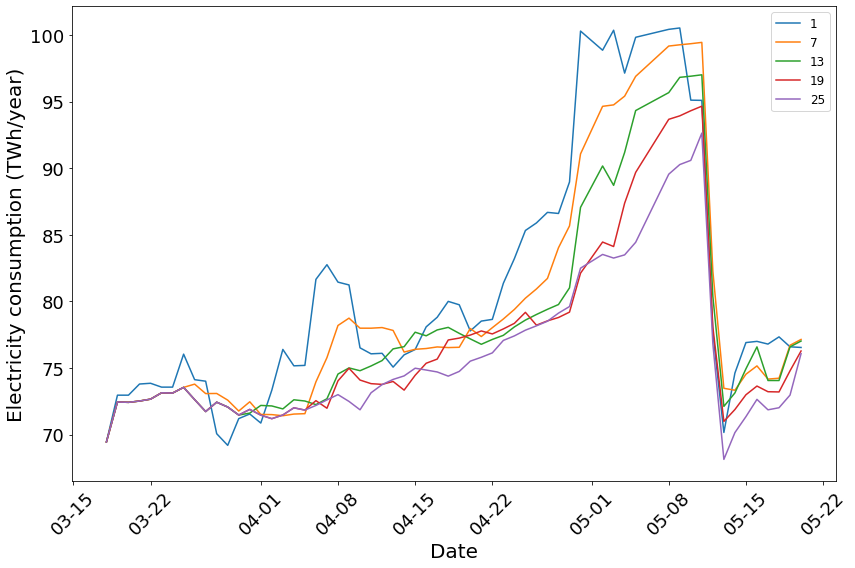

In [423]:
plt.figure(figsize=(12,8))
for moving_avg, consumption in moving_avg_dict.items():
    plt.plot(dates, consumption, label=moving_avg)
plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)", size=20)
plt.xlabel("Date", size=20)
plt.gca().xaxis.set_major_formatter(date_form)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.legend(prop={"size":12})
plt.tight_layout()
plt.savefig(FIG_PATH+'moving_average.png')
plt.show()

## Different estimate scenario's

In [534]:
def calc_estimations(bounds, PUE = 1.1):
    """
    Adds the PUE and sums over all coins
    """
    estimates = {'uniform': [], 'weighted': [], 'breakeven': []}    
    for bounds_day in bounds:
        uniform = np.sum(bounds_day['estimate'])*PUE
        weighted = np.sum(bounds_day['estimate_weighted'])*PUE
        breakeven = np.sum(bounds_day['estimate_breakeven'])*PUE
        estimates['uniform'].append(uniform)
        estimates['weighted'].append(weighted)
        estimates['breakeven'].append(breakeven)
    return estimates

### Weighted

In [535]:
def calc_estimate_weighted(coin, hashrate_share, coin_prof_hardware_dict):
    """
    Returns an on the electricity consumption of cryptocoins in W
    To put Wh per year, multiply by hours_in_year
    """
    if coin.name not in coin_prof_hardware_dict:
        #print(f"Error, no hardware for {coin.name}")
        return 0
    if coin_prof_hardware_dict[coin.name].empty:
        #print(f"Error, no profitable hardware for {coin.name}")
        return 0
    prof_hardware = coin_prof_hardware_dict[coin.name].copy()
    
    total_efficiency = np.sum(prof_hardware['efficiency'])
    efficiency_share = prof_hardware['efficiency']/total_efficiency
    
    prof_hardware['hashrate_part'] = (coin['nethash_calc']*hashrate_share*efficiency_share)
    
    electricity_consumption = prof_hardware['consumption']*prof_hardware['hashrate_part']
    
    return np.sum(electricity_consumption)*W_to_TWh  

### Break-even period

In [536]:
bitcoin_hardware_cost = pd.read_csv(HARDWARE_PATH + 'bitcoin_hardware_cost.csv')
ethereum_hardware_cost = pd.read_csv(HARDWARE_PATH + 'ethereum_hardware_cost.csv')
hardware_cost_dict = {'bitcoin':bitcoin_hardware_cost, 'ethereum': ethereum_hardware_cost}

In [537]:
def calc_breakeven_share(breakeven_data):
    breakeven_rev = 1 / breakeven_data
    total_breakeven = np.sum(breakeven_rev)
    return breakeven_rev/total_breakeven

In [538]:
# TODO: implement this code in profitability threshold
def calc_estimate_breakeven(coin, hashrate_share, coin_prof_hardware_dict, PUE=std_PUE, electricity_price=avg_price_wet):
    """
    Returns an on the electricity consumption of cryptocoins in W
    To put Wh per year, multiply by hours_in_year
    """
    if coin.name != "bitcoin" and coin.name != "ethereum":
        return calc_estimate(coin, hashrate_share, coin_prof_hardware_dict)
        
    prof_hardware = coin_prof_hardware_dict[coin.name].copy()
    prof_hardware = pd.merge(hardware_cost_dict[coin.name], prof_hardware, on='name', how='inner')
    
    revenue_per_sec = coin['price_MA']*coin['block_reward']/coin['block_time']
    
    # breakeven time (s) is investment cost / (rev-costs) 
    
    prof_hardware['revenue'] = (prof_hardware['hashing_power']/coin['nethash_calc'])*revenue_per_sec
    prof_hardware['cost'] = prof_hardware['power']*electricity_price*PUE['estimate']
    
    prof_hardware['breakeven'] = prof_hardware['price']/(prof_hardware['revenue']-prof_hardware['cost'])
        
    prof_hardware['breakeven_share'] = calc_breakeven_share(prof_hardware['breakeven'])
        
    prof_hardware['hashrate_part'] = (coin['nethash_calc']*hashrate_share*prof_hardware['breakeven_share'])
    
    electricity_consumption = prof_hardware['consumption']*prof_hardware['hashrate_part']
    
    return np.sum(electricity_consumption)*W_to_TWh  

In [539]:
# Get hardware bounds
hardware_estimates = hardware_based_estimation(data_hist, estimates=True)
hardware_estimates_total = calc_estimations(hardware_estimates)

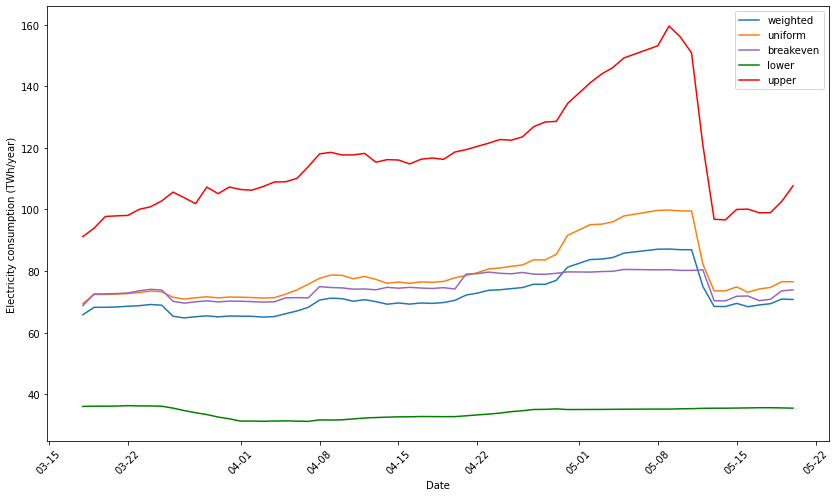

In [547]:
plt.figure(figsize=(14,8))
plt.plot(dates, hardware_estimates_total['weighted'], label="weighted")
plt.plot(dates, hardware_estimates_total['uniform'], label="uniform")
plt.plot(dates, hardware_estimates_total['breakeven'], color = "C4",label="breakeven")
plt.plot(dates, hardware_bounds_total['lower'], color = "green", label="lower")
plt.plot(dates, hardware_bounds_total['upper'], color = "red", label="upper")
plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)")
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(date_form)

plt.legend()
plt.show()

In [541]:
weighted_difference_perc = (np.array(hardware_estimates_total['uniform'])-np.array(hardware_estimates_total['weighted']))/np.array(hardware_estimates_total['uniform'])
breakeven_difference_perc = (np.array(hardware_estimates_total['breakeven'])-np.array(hardware_estimates_total['weighted']))/np.array(hardware_estimates_total['uniform'])

In [542]:
def estimations_differences(hardware_estimates_total, method):
    difference_perc = (np.array(hardware_estimates_total['uniform'])-np.array(hardware_estimates_total[method]))/np.array(hardware_estimates_total['uniform'])
    minimum = round(np.min(difference_perc),3)*100
    maximum = round(np.max(difference_perc),3)*100
    mean = round(np.mean(difference_perc),3)*100
    print(f" Minimum: {minimum} \n Maximum: {maximum} \n Mean: {mean}")

In [543]:
estimations_differences(hardware_estimates_total, 'weighted')
estimations_differences(hardware_estimates_total, 'breakeven')

 Minimum: 5.3 
 Maximum: 12.7 
 Mean: 8.799999999999999
 Minimum: -0.8 
 Maximum: 19.400000000000002 
 Mean: 4.8


## Final model

In [551]:
# Get hardware bounds
PUE = {'lower': 1, 'estimate': 1.1, 'upper':1.2}
hardware_estimates = hardware_based_estimation(data_hist, estimates=True, geography_data = CBECI_geography, PUE_dict=PUE, moving_avg_price=7, PUE_fix=True)
hardware_estimates_total = calc_estimations(hardware_estimates)
hardware_bounds_total = calc_hardware_bounds(hardware_estimates, PUE_dict=PUE)

In [552]:
# Get revenue bounds
revenue_bounds_coin = revenue_based_estimation(data_hist, world_avg_CBECI, moving_avg=7)
revenue_bounds_total = calc_revenue_bounds(revenue_bounds_coin, revenue_percent)

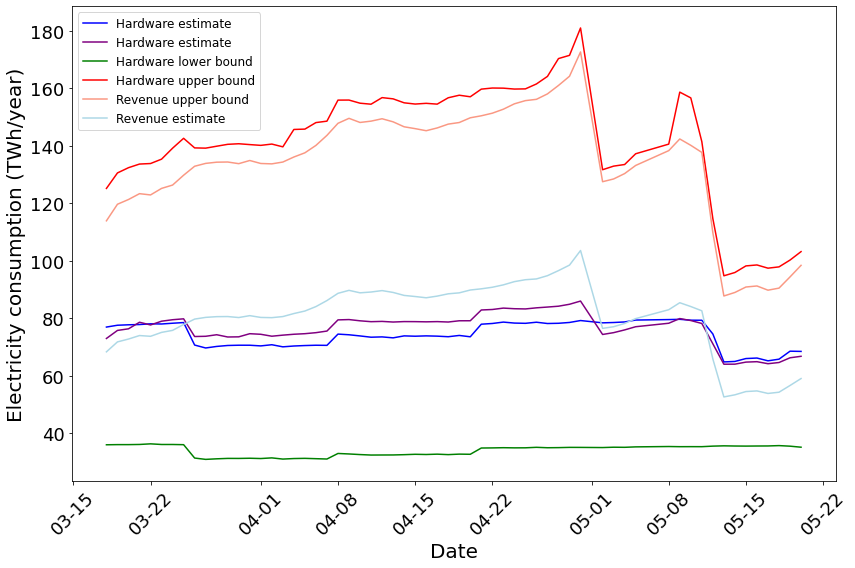

In [560]:
plt.figure(figsize=(12,8))
plt.plot(dates, hardware_estimates_total['breakeven'], label="Hardware estimate", color="blue")
plt.plot(dates, hardware_estimates_total['weighted'], label="Hardware estimate", color="purple")
plt.plot(dates, hardware_bounds_total['lower'], label="Hardware lower bound",color="green")
plt.plot(dates, hardware_bounds_total['upper'], label="Hardware upper bound", color="red")
plt.plot(dates, revenue_bounds_total['upper'], label="Revenue upper bound", color="#FA9883")
plt.plot(dates, revenue_bounds_total['estimate'], label="Revenue estimate", color="lightblue")
plt.xticks(rotation=45)
plt.ylabel("Electricity consumption (TWh/year)", size=20)
plt.xlabel("Date", size=20)
plt.legend(prop={"size":12})
plt.gca().xaxis.set_major_formatter(date_form)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.tight_layout()
plt.savefig(FIG_PATH+'final_results.png')
plt.show()

# Ecological Footprint

## Emissions

In [619]:
renewable = np.sum(total_geography['share']*total_geography['renewable'])
non_renewable = 1-renewable
emission_renewable = 18.5 # gCO2-eq/kWh
emission_non_renewable = 250 # gCO2-eq/kWh

In [620]:
def consumption_to_emission(consumption):
    """ 
    Returns the emission in gCO2-eq/year
    """
    average_consumption = np.mean(np.asarray(consumption)*(10**9))
    emission = average_consumption*renewable*emission_renewable + average_consumption*non_renewable*emission_non_renewable
    return emission

In [621]:
consumption_to_emission(hardware_estimates_total['breakeven'])/(10**12) # Million tonnes!!!

11.555317494354219

In [ ]:
consumption_to_emission(hardware_bounds_total['lower'])
consumption_to_emission(hardware_bounds_total['upper'])

## E-waste

# Old

## First web-based trial (OLD)

First, we calculate a lower bound by using only the most efficient hardware

In [ ]:
def hardware_hashrate(coin): # Max hashes per second for the hardware
    if coin['algorithm'] == 'SHA-256':
        return 16*10**12
    if coin['algorithm'] == 'Scrypt':
        return 504*10**6
    if coin['algorithm'] == 'Ethash':
        return 190*10**6
    if coin['algorithm'] == 'Equihash':
        return 42*10**3
    return 0

In [ ]:
# Energy use in Watts
def hardware_consumption(coin): 
    if coin['algorithm'] == 'SHA-256':
        return 1280
    if coin['algorithm'] == 'Scrypt':
        return 970
    if coin['algorithm'] == 'Ethash':
        return 800
    if coin['algorithm'] == 'Equihash':
        return 760
    return 0

In [ ]:
def hardware_consumption_hash(coin): # Joule per hash
    if coin['algorithm'] == 'SHA-256':
        return 0.1/(10**9)
    if coin['algorithm'] == 'Scrypt':
        return 1.6/(10**6) # Antminer L3+ https://www.asicminervalue.com/miners/bitmain/antminer-l3-504mh
    if coin['algorithm'] == 'Ethash':
        return 4/(10**6) # Bitmain Antminer E3 – Ethereum 190 MH/S
    else: 
        return 0

In [ ]:
def calc_num_hardware(coin):
    if coin['hardware_hashrate'] == 0:
        return 0
    if coin['nethash_calc'] != 0:
        return coin['nethash_calc']/coin['hardware_hashrate'] 
    else:
        return coin['nethash_scraped']/coin['hardware_hashrate']

In [ ]:
found_data['difficulty_factor'] = found_data.apply(lambda x: difficulty_factor(x), axis=1)
found_data['hardware_hashrate'] = found_data.apply(lambda x: hardware_hashrate(x), axis=1)
found_data['hardware_consumption'] = found_data.apply(lambda x: hardware_consumption(x), axis=1)

In [ ]:
found_data['nethash_calc'] = found_data['difficulty']*found_data['difficulty_factor']/found_data['block_time'] # amount of hashes per second
found_data['num_hardware'] = found_data.apply(lambda x: calc_num_hardware(x),axis=1)
found_data['energy_per_second'] = found_data['num_hardware']*found_data['hardware_consumption'] # in Watt
found_data['annual_energy'] = found_data['energy_per_second']*8760 # hours in a year
found_data

In [ ]:
found_data_difficulty = found_data[found_data['difficulty_factor'] != 0]
print(found_data_difficulty[["#", "algorithm", "difficulty_factor"]].to_latex())

In [ ]:
total_energy_crypto = np.sum(found_data['annual_energy'])
total_energy_crypto_TWh = total_energy_crypto/10**12
total_energy_crypto_TWh

In [ ]:
total_energy_world_TWh = 19504 # TWh 

In [ ]:
total_energy_crypto_TWh/total_energy_world_TWh

0.4% of global electricity

## Extrapollation of energy use of other crypto coins

What percent of crypto market cap is represented in the dataset?

In [ ]:
found_market_cap = found_data['market_cap'].sum()
top100_market_cap = mineable_100['market_cap'].sum()
total_market_cap =  186318558825 #https://coinmarketcap.com/charts/
print(f'The webscrabed data represents {round(found_market_cap/top100_market_cap,3)*100}% of the market cap of the top 100, and {round(found_market_cap/total_market_cap,3)*100}% of the total market cap')

In [ ]:
found_data_energy = result[result['estimate'] != 0]
found_manual_market_cap = result['market_cap'].sum()
print(f'The manual data represents {round(found_manual_market_cap/top100_market_cap,3)*100}% of the market cap of the top 100, and {round(found_manual_market_cap/total_market_cap,3)*100}% of the total market cap')

Looking up all the other initial difficulties (~15 more coins) would only gain us an additional 0.4% of the total market cap

In [ ]:
result['estimate'].plot(kind='bar')
plt.yscale('log')
plt.xticks(rotation=45)
plt.ylabel('annual energy consumption (in Wh)')
plt.xlabel('coin')
plt.title('Annual energy consumption of different cryptocurrencies')
plt.show()

In [ ]:
plt.scatter(result['market_cap'],result['estimate'])
plt.yscale('log')
plt.ylabel('annual energy consumption (Wh)')
plt.xscale('log')
plt.xlabel('market cap ($)')
plt.xticks(rotation=45)
plt.title('Annual energy consumption vs market cap of cryptocurrencies')
plt.show()

Linear correlation between market cap and energy consumption with some outliers (e.g. Dogecoin, which uses auxilary POW with litecoin

In [ ]:
nethash_calc = result[result['estimate'] != 0].sort_values(by='algorithm')

In [ ]:
cdict= {'Equihash':'blue', 'Ethash':'grey','Lyra2REv2':'green','RandomX':'black','SHA-256':'red','Scrypt':'orange','X11':'lightgreen','X16Rv2':'purple'}
cmap = nethash_calc['algorithm'].apply(lambda x: cdict[x])
plt.scatter(nethash_calc['market_cap'],nethash_calc['estimate'],c=cmap,label=nethash_calc['algorithm'])
plt.yscale('log')
plt.ylabel('nethash calculated')
plt.xscale('log')
plt.xlabel('market cap ($)')
plt.xticks(rotation=45)
plt.title('Nethash calculated vs market cap of cryptocurrencies')
plt.show()

## Results function

dates = []
hardware_bounds = {'upper': [], 'lower': [], 'estimate': [], 'market_cap': []}
revenue_bounds = {'upper': [], 'estimate': []}

# Used to check hypothesis and extrapollation
market_cap_hardware = pd.DataFrame()
coin_energy = pd.DataFrame()
market_caps_total = []

for file in os.listdir(HIST_PATH):
    data = pd.read_csv(HIST_PATH+file)
    data = clean_mineable_data(data)

    # Get the dates in a list
    date = datetime.strptime(file[13:23], '%m-%d-%Y')
    dates.append(date)
    
    # Get hardware bounds
    bounds = hardware_based_estimation(data)
    # Add bound per coin per day
    coin_energy[date] = bounds['estimate']*ESTIMATE_PUE
    
    # Get bounds for all coins
    hardware_bounds = calc_hardware_bounds(bounds, hardware_bounds)
    
    # Get market cap of the used data
    market_cap_hardware[date] = bounds['market_cap']
        
    # Get revenue bounds
    revenue_bounds = calc_revenue_bounds(data,revenue_bounds)
    
    # Get total market cap of data
    market_caps_total.append(np.sum(data['market_cap']))

## Extrapolation

In [ ]:
found_data_energy = found_data[found_data['annual_energy'] != 0]
found_manual_market_cap = found_missing_difficulty['market_cap'].sum()
print(f'The manual data represents {round(found_manual_market_cap/top100_market_cap,3)*100}% of the market cap of the top 100, and {round(found_manual_market_cap/total_market_cap,3)*100}% of the total market cap')

Looking up all the other initial difficulties (~15 more coins) would only gain us an additional 0.4% of the total market cap

In [ ]:
# Which ranks of the market cap are represented?
found_data[found_data['difficulty_factor'] != 0]['#'].hist(bins=10)
plt.show()

In [ ]:
found_data_energy['annual_energy'].plot(kind='bar')
plt.yscale('log')
plt.xticks(rotation=45)
plt.ylabel('annual energy consumption (in Wh)')
plt.xlabel('coin')
plt.title('Annual energy consumption of different cryptocurrencies')
plt.show()

In [ ]:
plt.scatter(found_data_energy['market_cap'],found_data_energy['annual_energy'])
plt.yscale('log')
plt.ylabel('annual energy consumption (Wh)')
plt.xscale('log')
plt.xlabel('market cap ($)')
plt.xticks(rotation=45)
plt.title('Annual energy consumption vs market cap of cryptocurrencies')
plt.show()

Linear correlation between market cap and energy consumption with some outliers (e.g. Dogecoin, which uses auxilary POW with litecoin

In [ ]:
nethash_calc = found_data[found_data['nethash_calc'] != 0].sort_values(by='algorithm')

In [ ]:
cdict= {'Equihash':'blue', 'Ethash':'grey','Lyra2REv2':'green','RandomX':'black','SHA-256':'red','Scrypt':'orange','X11':'lightgreen','X16Rv2':'purple'}
cmap = nethash_calc['algorithm'].apply(lambda x: cdict[x])
plt.scatter(nethash_calc['market_cap'],nethash_calc['nethash_calc'],c=cmap,label=nethash_calc['algorithm'])
plt.yscale('log')
plt.ylabel('nethash calculated')
plt.xscale('log')
plt.xlabel('market cap ($)')
plt.xticks(rotation=45)
plt.title('Nethash calculated vs market cap of cryptocurrencies')
plt.show()